# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

<font color='red'> Ответы будут красным цветом! или иногда через print()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Для постоянности эксперимента. На примере разбиения выборки на обучающую и тестовую: если каждый раз рабивать датасет различиными способами, то сложно будет оценить качество модели (если вообще возможно)")

Для постоянности эксперимента. На примере разбиения выборки на обучающую и тестовую: если каждый раз рабивать датасет различиными способами, то сложно будет оценить качество модели (если вообще возможно)


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv(
    'https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv(
    'https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
df_train.sample(n=10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [6]:
df_test.head(-1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,Maruti Swift Dzire VXi,2010,240000,143000,Petrol,Individual,Manual,First Owner,17.5 kmpl,1298 CC,85.8 bhp,114Nm@ 4000rpm,5.0
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [7]:
df_train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [8]:
print('Количество пропусков в колонках:\n\nTrain:\n',
      df_train.isna().sum(), '\n\nTest:\n', df_test.isna().sum())

Количество пропусков в колонках:

Train:
 name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64 

Test:
 name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64


<font color='red'>Есть. В колонках: mileage engine max_power torque seats

## Пропуски есть как в train, так и в test

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [9]:
df_train_copy = df_train.drop(labels=['selling_price'], axis=1, inplace=False)
print('Количество объектов с одинаковым описанием признаков: ',
      df_train_copy.duplicated().sum())

Количество объектов с одинаковым описанием признаков:  1159


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [10]:
df_train_copy[df_train_copy.duplicated()]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [11]:
# получаем индексы для удаления
indexs = list(df_train_copy[df_train_copy.duplicated()].index)
df_train_copy = df_train.drop(labels=indexs, axis=0, inplace=False)  # удаляем
df_train = df_train_copy  # перезаписываем

In [12]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [13]:
df_train.reset_index(drop=True, inplace=True)
df_train  # для наглядности распечатываем

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [14]:
# поиск плохой строчки перед редактированием
df_train.loc[df_train['max_power'] == ' bhp']
df_train['max_power'][3586] = np.nan  # меняем на nan
df_train.loc[[3586]]  # проверка

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
3586,Maruti Omni CNG,2000,80000,100000,CNG,Individual,Manual,Second Owner,10.9 km/kg,796 CC,NaN,NaN,8.0


In [15]:
from tqdm import tqdm
import re


def edit(df, string_for_search):
    for i in tqdm(range(len(df))):
        try:
            df[string_for_search][i] = re.findall(
                r'\d+[\.\d+|\d+]', str(df[string_for_search][i]))[0]
        except:
            df[string_for_search][i] = df[string_for_search][i]
    return df[string_for_search].astype(float)


df_train_copy = df_train.copy()
df_train_copy['mileage'] = edit(df_train_copy, 'mileage')
df_train_copy['engine'] = edit(df_train_copy, 'engine')
df_train_copy['max_power'] = edit(df_train_copy, 'max_power')

df_test_copy = df_test.copy()
df_test_copy['mileage'] = edit(df_test_copy, 'mileage')
df_test_copy['engine'] = edit(df_test_copy, 'engine')
df_test_copy['max_power'] = edit(df_test_copy, 'max_power')

100%|██████████| 1000/1000 [00:00<00:00, 12316.52it/s]


In [16]:
df_train_copy = df_train_copy.drop('torque', axis=1)
df_test_copy = df_test_copy.drop('torque', axis=1)

In [17]:
df_train_copy

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.0,1248.0,74.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.0,1498.0,103.0,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.0,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.0,1298.0,88.0,5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.0,1197.0,81.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.0,1086.0,62.0,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.0,998.0,67.0,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.0,1197.0,82.0,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.0,1493.0,110.0,5.0


In [18]:
df_test_copy

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0,2498.0,112.0,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.0,1497.0,108.0,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.0,1799.0,130.0,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.0,1498.0,98.0,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.0,1172.0,65.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.0,1086.0,68.0,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.0,1197.0,81.0,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.0,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.0,1197.0,78.0,5.0


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [19]:
df_train_copy

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.0,1248.0,74.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.0,1498.0,103.0,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.0,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.0,1298.0,88.0,5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.0,1197.0,81.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.0,1086.0,62.0,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.0,998.0,67.0,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.0,1197.0,82.0,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.0,1493.0,110.0,5.0


In [20]:
df_train_nan = df_train_copy.copy()
df_train_nan.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          186
engine           186
max_power        184
seats            186
dtype: int64

In [21]:
from sklearn.impute import SimpleImputer

# train

X_real = df_train_copy[['mileage', 'engine', 'max_power', 'seats']]
mis_replacer = SimpleImputer(strategy="median")
X_ideal = pd.DataFrame(data=mis_replacer.fit_transform(
    X_real), columns=X_real.columns)

for i in ['mileage', 'engine', 'max_power', 'seats']:
    df_train_copy[[i]] = X_ideal[[i]]

df_train_copy.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [22]:
import statistics

# test

median_mileage = statistics.median(df_train_copy['mileage'])
median_engine = statistics.median(df_train_copy['engine'])
median_max_power = statistics.median(df_train_copy['max_power'])
median_seats = statistics.median(df_train_copy['seats'])

df_test_copy = df_test_copy.copy()

X_real = df_test_copy[['mileage', 'engine', 'max_power', 'seats']]
mis_replacer = SimpleImputer(
    fill_value=[median_mileage, median_engine, median_max_power, median_seats])
X_ideal = pd.DataFrame(data=mis_replacer.fit_transform(
    X_real), columns=X_real.columns)

for i in ['mileage', 'engine', 'max_power', 'seats']:
    df_test_copy[[i]] = X_ideal[[i]]

df_test_copy.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

<font color='red'>В дальнейшем анализе мы не используем значение конретно 4 кресла или 2 кресла, поэтому логично было бы закодировать данный признак (например one-hot encoding)

In [24]:
df_train_stage = df_train_copy.copy()
df_train_stage[['mileage', 'seats']
               ] = df_train_stage[['mileage', 'seats']].round(0)
df_train_stage[['mileage', 'seats']] = df_train_stage[[
    'mileage', 'seats']].astype(int)

df_test_stage = df_test_copy.copy()
df_test_stage[['mileage', 'seats']
              ] = df_test_stage[['mileage', 'seats']].round(0)
df_test_stage[['mileage', 'seats']] = df_test_stage[[
    'mileage', 'seats']].astype(int)

In [25]:
df_train_stage[['mileage', 'seats']].dtypes

mileage    int64
seats      int64
dtype: object

In [26]:
df_test_stage[['mileage', 'seats']].dtypes

mileage    int64
seats      int64
dtype: object

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

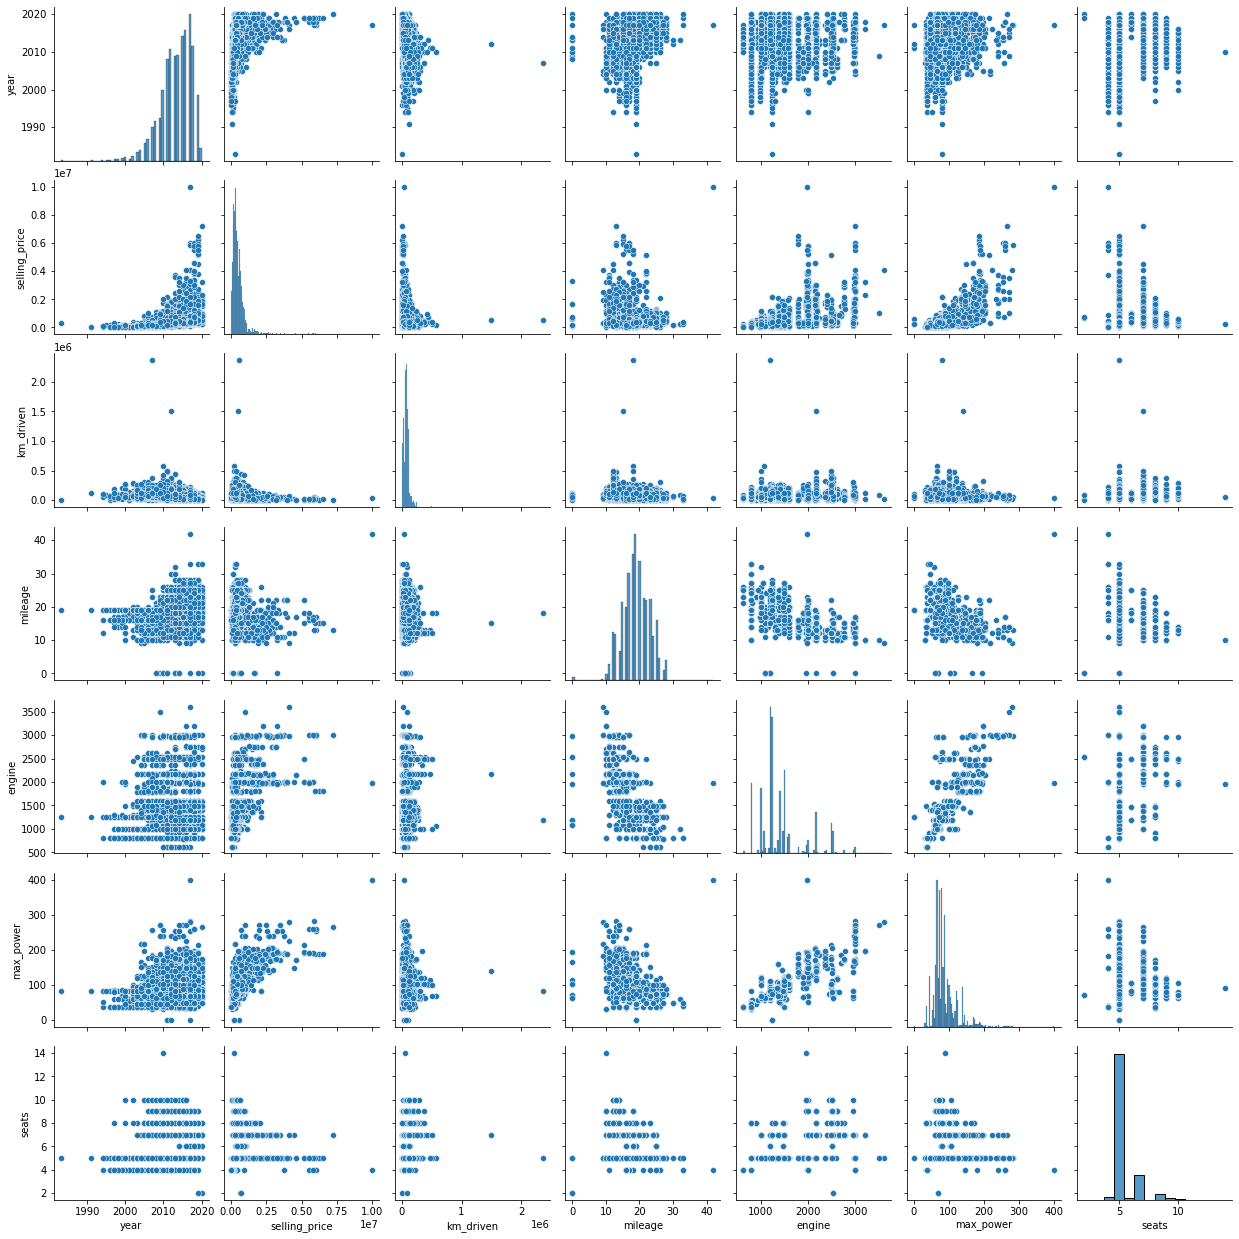

In [27]:
import seaborn as sns
sns.pairplot(df_train_stage)
plt.show()

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

<font color='red'>
    
1. Чем раньше машина сошла с конвеера (year), тем она дешевле (selling price).
2. Чем больше пробег (km_driven), тем цена выше.
3. Машины с оптимальным расходом топлива (mileage) (средние значения) - самые дорогие.
4. Чем больше объём двигателя (engine), тем дороже машина.
5. Чем больше мощность двигателя (max_power), тем машина дороже.
6. С ростом числа мест (seats), цена снижается. Семейный сегмент - бюджетный.

In [28]:
df_train_stage.corr()

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427279,-0.368966,0.340980,0.002819,0.155518,0.041178
selling_price,0.427279,1.000000,-0.164828,-0.101870,0.447672,0.692608,0.149953
km_driven,-0.368966,-0.164828,1.000000,-0.184259,0.229766,0.025558,0.192328
mileage,0.340980,-0.101870,-0.184259,1.000000,-0.574745,-0.366024,-0.457939
engine,0.002819,0.447672,0.229766,-0.574745,1.000000,0.682608,0.652172
max_power,0.155518,0.692608,0.025558,-0.366024,0.682608,1.000000,0.245716
seats,0.041178,0.149953,0.192328,-0.457939,0.652172,0.245716,1.000000


<font color='red'>    
На счёт корреляции признаков. Самая большая корреляция между следующими парами признаков:

year - km_driven (отрицательная);<br>
mileage - engine (отрицательная);<br>
engine - max_power;<br>
seats - engine;<br>

Цена на авто максимально коррелирует с мощностью двигателя.

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

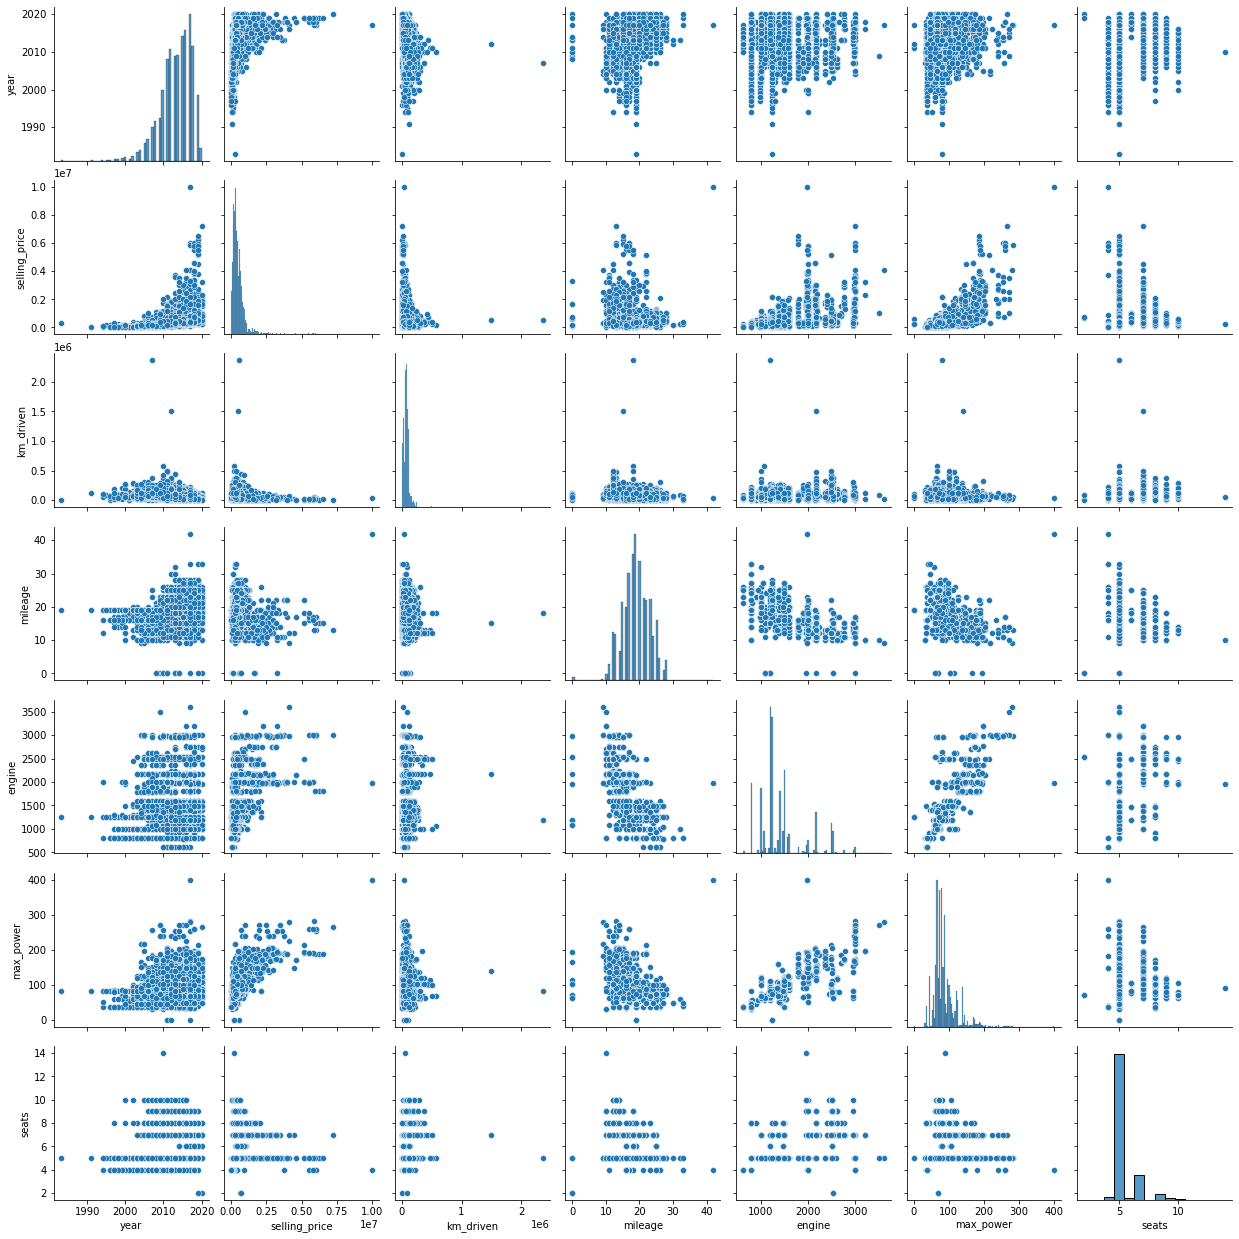

In [29]:
sns.pairplot(df_train_stage)
plt.show()

<font color='red'>"Похожими ли оказались совокупности при разделении на трейн и тест?" - под копирку, отличий не видно.

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

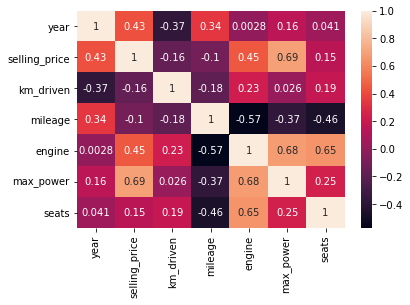

In [30]:
sns.heatmap(df_train_stage.corr(), annot=True)
plt.show()

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

<font color='red'>
    
1. Если не брать в расчёт отрицательную корреляцию, а смотреть только на значения близкие к нулю, то это: year - engine


2. Сильная положительная линейная зависимость между: engine - max_power (selling price не берем в расчёт, т.к. это целевая переменная).


3. Нет, т.к. корреляция отрицательная.

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

<font color='red'>см. пункт 2 предыдущего ответа

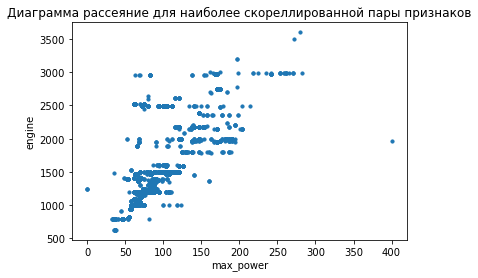

In [31]:
_, ax = plt.subplots()
ax.scatter(df_train_stage['max_power'], df_train_stage['engine'], s=10)
ax.set_title('Диаграмма рассеяние для наиболее скореллированной пары признаков')
ax.set_xlabel('max_power')
ax.set_ylabel('engine')
plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

<font color='red'>Кажется, что зависимость "количество мест - цена" не является лин. зависимой, не смотря на положительную корреляцию 0.15 

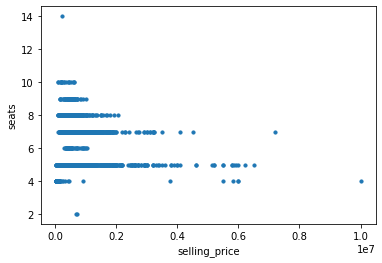

In [32]:
_, ax = plt.subplots()
ax.scatter(df_train_stage['selling_price'], df_train_stage['seats'], s=10)
ax.set_xlabel('selling_price')
ax.set_ylabel('seats')
plt.show()

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [33]:
y_train = df_train_stage[['selling_price']]
X_train = df_train_stage.drop(labels=[
                              'selling_price', 'name', 'fuel', 'seller_type', 'transmission', 'owner'], axis=1)

In [34]:
assert X_train.shape == (5840, 6)

In [35]:
y_test = df_test_stage[['selling_price']]
X_test = df_test_stage.drop(labels=[
                            'selling_price', 'name', 'fuel', 'seller_type', 'transmission', 'owner'], axis=1)

In [36]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE


def learn(model, X_train, y_train, X_test, y_test):
    model = model
    model.fit(X_train, y_train)
    prediction_train = pd.DataFrame(model.predict(X_train))
    prediction_test = pd.DataFrame(model.predict(X_test))

    print(f'MSE_train: {MSE(y_train, prediction_train):.1f}')
    print(f'MSE_test: {MSE(y_test, prediction_test):.1f}')
    print(f'r2_score_train: {r2_score(y_train, prediction_train):.4f}')
    print(f'r2_score_test: {r2_score(y_test, prediction_test):.4f}')
    print(f'Веса:', model.coef_)
    print(f'w_0:', model.intercept_)

    return model, prediction_train, prediction_test


model, prediction_train, prediction_test = learn(
    LinearRegression(), X_train, y_train, X_test, y_test)

MSE_train: 116869295903.5
MSE_test: 233168841051.7
r2_score_train: 0.5923
r2_score_test: 0.5944
Веса: [[ 3.76607296e+04 -7.30579292e-01  6.56720645e+03  1.22993751e+02
   1.02066631e+04 -2.42465054e+04]]
w_0: [-76313072.74757771]


In [38]:
X_train

,year,km_driven,mileage,engine,max_power,seats
0,2014,145500,23,1248.0,74.0,5
1,2014,120000,21,1498.0,103.0,5
2,2010,127000,23,1396.0,90.0,5
3,2007,120000,16,1298.0,88.0,5
4,2017,45000,20,1197.0,81.0,5
...,...,...,...,...,...,...
5835,2008,191000,17,1086.0,62.0,5
5836,2013,50000,18,998.0,67.0,5
5837,2013,110000,18,1197.0,82.0,5
5838,2007,119000,16,1493.0,110.0,5


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(data=X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(data=X_test_scaled)

In [40]:
model, prediction_train, prediction_test = learn(
    LinearRegression(), X_train_scaled, y_train, X_test_scaled, y_test)

MSE_train: 116869295903.5
MSE_test: 233168841051.7
r2_score_train: 0.5923
r2_score_test: 0.5944
Веса: [[154230.90423306 -43882.97081876  26307.47540837  59728.37904983
  322658.84159073 -23816.36855453]]
w_0: [522960.09109589]


In [41]:
print('Изменений нет')

Изменений нет


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

<font color='red'>Пока трудно сказать о том, что какой то признак наиболее информативен, т.к. веса большие везде. Явно видно только то, что год выпуска машины, пожалуй, один из самых важных.

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [42]:
from sklearn.linear_model import Lasso

model, prediction_train, prediction_test = learn(
    Lasso(), X_train_scaled, y_train, X_test_scaled, y_test)

MSE_train: 116869295913.6
MSE_test: 233169499175.0
r2_score_train: 0.5923
r2_score_test: 0.5944
Веса: [154230.71366662 -43881.84512309  26305.60412197  59723.53270491
 322659.7577715  -23813.49861191]
w_0: [522960.09109589]


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

<font color='red'>Нет, т.к. требуется ручной подбор коэффициента alpha.

In [43]:
from sklearn.linear_model import Lasso

model, prediction_train, prediction_test = learn(
    Lasso(alpha=10000), X_train_scaled, y_train, X_test_scaled, y_test)

MSE_train: 117744395990.0
MSE_test: 240310088346.9
r2_score_train: 0.5892
r2_score_test: 0.5819
Веса: [153062.42847818 -32511.01758254   6961.02561945  15656.18882127
 329700.63216796     -0.        ]
w_0: [522960.09109589]


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [44]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

modelL1 = GridSearchCV(Lasso(), param_grid={
                       'alpha': [i for i in range(0, 2000, 10)]}, cv=10)
modelL1.fit(X_train_scaled, y_train)
bestValue = modelL1.best_params_

print(f'Оптимальное alpha: {bestValue["alpha"]:.3f}')

Оптимальное alpha: 1990.000


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

<font color='red'>

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

<font color='red'>Лучший коэффициент: 1990. Но при нём веса не занулились:

In [45]:
model, prediction_train, prediction_test = learn(
    Lasso(alpha=1990), X_train_scaled, y_train, X_test_scaled, y_test)

MSE_train: 116908346570.9
MSE_test: 234515177389.5
r2_score_train: 0.5921
r2_score_test: 0.5920
Веса: [153804.68767363 -41676.4225047   22669.88941845  50235.08517815
 324434.31383628 -18143.98674223]
w_0: [522960.09109589]


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [46]:
from sklearn.linear_model import ElasticNet

modelL2 = GridSearchCV(ElasticNet(), param_grid={'alpha': [i for i in range(
    0, 5000, 50)], 'l1_ratio': [i/10 for i in range(11)]}, cv=10)
modelL2.fit(X_train_scaled, y_train)
bestValue, ratio = modelL2.best_params_

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [47]:
print(
    f'Оптимальное alpha: {modelL2.best_params_["alpha"]:.3f}\nОптимальное значение l1_ratio: {modelL2.best_params_["l1_ratio"]:.3f}\n\n')
model, prediction_train, prediction_test = learn(ElasticNet(alpha=modelL2.best_params_[
                                                 "alpha"], l1_ratio=modelL2.best_params_['l1_ratio']), X_train_scaled, y_train, X_test_scaled, y_test)

Оптимальное alpha: 4950.000
Оптимальное значение l1_ratio: 1.000


MSE_train: 117111484542.2
MSE_test: 236664244801.5
r2_score_train: 0.5914
r2_score_test: 0.5883
Веса: [153200.92793704 -38381.21929743  17217.64061324  36077.57259745
 327079.06337318  -9706.39726124]
w_0: [522960.09109589]


<font color='red'>Качество по прежнему остаётся неудовлетворительным

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [48]:
X_train = df_train_stage.drop(labels=['name', 'selling_price'], axis=1)
X_train[['seats']] = X_train[['seats']].astype(str)

In [49]:
assert X_train.shape == (5840, 10)

In [50]:
X_train.describe(include='object')

,fuel,seller_type,transmission,owner,seats
count,5840,5840,5840,5840,5840
unique,4,3,2,5,9
top,Diesel,Individual,Manual,First Owner,5
freq,3177,5223,5336,3603,4618


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [51]:
# или можно использовать get_dummies из библиотеки pandas
from sklearn.preprocessing import OneHotEncoder

X_train_cat = X_train[['fuel', 'seller_type',
                       'transmission', 'owner', 'seats']]
X_train_num = X_train[['year', 'km_driven', 'mileage', 'engine', 'max_power']]
enc = OneHotEncoder(drop="first")
enc.fit(X_train_cat)
X_train_cat = enc.transform(X_train_cat).toarray()
X_train_cat = pd.DataFrame(X_train_cat)
X_dum_train = pd.concat([X_train_num, X_train_cat], axis=1, join='inner')
X_dum_train.head()

,year,km_driven,mileage,engine,max_power,0,1,2,3,4,...,8,9,10,11,12,13,14,15,16,17
0,2014,145500,23,1248.0,74.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2014,120000,21,1498.0,103.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2010,127000,23,1396.0,90.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2007,120000,16,1298.0,88.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2017,45000,20,1197.0,81.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [52]:
X_test = df_test_stage.drop(labels=['name', 'selling_price'], axis=1)
X_test[['seats']] = X_test[['seats']].astype(str)
X_test_cat = X_test[['fuel', 'seller_type', 'transmission', 'owner', 'seats']]
X_test_num = X_test[['year', 'km_driven', 'mileage', 'engine', 'max_power']]
X_test_cat = enc.transform(X_test_cat).toarray()
X_test_cat = pd.DataFrame(X_test_cat)
X_dum_test = pd.concat([X_test_num, X_test_cat], axis=1, join='inner')
X_dum_test.head()

,year,km_driven,mileage,engine,max_power,0,1,2,3,4,...,8,9,10,11,12,13,14,15,16,17
0,2010,168000,14,2498.0,112.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2017,25000,21,1497.0,108.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2007,218463,12,1799.0,130.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2015,173000,25,1498.0,98.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2011,70000,16,1172.0,65.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [53]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

X_dum_train_scaled = scaler.fit_transform(X_dum_train)
X_dum_test_scaled = scaler.transform(X_dum_test)
X_dum_train_scaled = pd.DataFrame(data=X_dum_train_scaled)
X_dum_test_scaled = pd.DataFrame(data=X_dum_test_scaled)

model = GridSearchCV(Ridge(), param_grid={
                     'alpha': [i for i in range(0, 1000, 5)]}, scoring='r2', cv=10)
model.fit(X_dum_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,
                                   60, 65, 70, 75, 80, 85, 90, 95, 100, 105,
                                   110, 115, 120, 125, 130, 135, 140, 145, ...]},
             scoring='r2')

In [54]:
model, predicton_train, predicton_test = learn(Ridge(alpha=model.best_params_[
                                               'alpha']), X_dum_train_scaled, y_train, X_dum_test_scaled, y_test)

MSE_train: 96726812683.6
MSE_test: 223126896416.7
r2_score_train: 0.6625
r2_score_test: 0.6118
Веса: [[136455.15813184 -34305.68313636  21464.03426588  57075.27883578
  238026.53743774  19008.78555493   8331.25718639 -17608.46231133
  -34082.83394768  -6802.09236564 -86092.18358126  -8660.59922435
  -27421.38068482  80203.77578202 -13904.37560016  -2883.31648563
     623.86976613  58960.05376711  -7453.55324643  -8848.68346593
   -4807.99960276  -1297.91939506  -4674.47370306]]
w_0: [522960.09109589]


<font color='red'>Качество улучшилось (r2_score увеличился на 0.05 примерно). Ошибка MSE уменьшилась на порядок.

# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

## <font color='red'>1.1. Добавим признак power_by_volume - число лошадей на литр

In [55]:
df_train_copy = df_train_stage.copy()
df_train_copy.insert(0, 'power_by_volume', [np.nan for i in range(
    len(df_train_copy))], allow_duplicates=True)
for i in tqdm(range(len(df_train_copy))):
    df_train_copy['power_by_volume'][i] = df_train_copy['max_power'][i] / \
        df_train_copy['engine'][i]

df_test_copy = df_test_stage.copy()
df_test_copy.insert(0, 'power_by_volume', [np.nan for i in range(
    len(df_test_copy))], allow_duplicates=True)
for i in tqdm(range(len(df_test_copy))):
    df_test_copy['power_by_volume'][i] = df_test_copy['max_power'][i] / \
        df_test_copy['engine'][i]

X_train = df_train_copy.drop(labels=['name', 'selling_price'], axis=1)
X_train[['seats']] = X_train[['seats']].astype(str)
X_train_cat = X_train[['fuel', 'seller_type',
                       'transmission', 'owner', 'seats']]
X_train_num = X_train[['power_by_volume', 'year',
                       'km_driven', 'mileage', 'engine', 'max_power']]
enc = OneHotEncoder(drop="first")
enc.fit(X_train_cat)
X_train_cat = enc.transform(X_train_cat).toarray()
X_train_cat = pd.DataFrame(X_train_cat)
X_dum_train = pd.concat([X_train_num, X_train_cat], axis=1, join='inner')

X_test = df_test_copy.drop(labels=['name', 'selling_price'], axis=1)
X_test[['seats']] = X_test[['seats']].astype(str)
X_test_cat = X_test[['fuel', 'seller_type', 'transmission', 'owner', 'seats']]
X_test_num = X_test[['power_by_volume', 'year',
                     'km_driven', 'mileage', 'engine', 'max_power']]
X_test_cat = enc.transform(X_test_cat).toarray()
X_test_cat = pd.DataFrame(X_test_cat)
X_dum_test = pd.concat([X_test_num, X_test_cat], axis=1, join='inner')

scaler = StandardScaler()
X_dum_train_scaled = scaler.fit_transform(X_dum_train)
X_dum_test_scaled = scaler.transform(X_dum_test)
X_dum_train_scaled = pd.DataFrame(data=X_dum_train_scaled)
X_dum_test_scaled = pd.DataFrame(data=X_dum_test_scaled)

model = GridSearchCV(Ridge(), param_grid={
                     'alpha': [i for i in range(0, 2000, 10)]}, scoring='r2', cv=10)
model.fit(X_dum_train_scaled, y_train)
print('alpha: ', model.best_params_['alpha'])
model, predicton_train, predicton_test = learn(Ridge(alpha=model.best_params_[
                                               'alpha']), X_dum_train_scaled, y_train, X_dum_test_scaled, y_test)

100%|██████████| 1000/1000 [00:00<00:00, 14582.29it/s]


alpha:  20
MSE_train: 94206912638.2
MSE_test: 210853387413.4
r2_score_train: 0.6713
r2_score_test: 0.6332
Веса: [[-109612.8001579   155637.02755938  -30097.10761613   34787.14677927
   -73770.22768625  415839.74732547   23918.60290774   12694.80481391
     4971.1140406   -31852.19814066   -7019.65354885  -78067.4623745
    -6053.28487445  -24668.58204354   86650.17852786  -10407.49631574
    -3154.95340113    2408.61502356   57241.7610052   -25877.14256724
   -13844.09108381  -19455.24643925   -4598.03584469   -1236.11066856]]
w_0: [522960.09109589]


<font color='red'>Качество возрасло

## <font color='red'>1.2. Добавим признак squared_year - год изготовления year в квадрате

In [56]:
df_train_copy = df_train_stage.copy()
df_train_copy.insert(0, 'power_by_volume', [np.nan for i in range(
    len(df_train_copy))], allow_duplicates=True)
df_train_copy.insert(1, 'squared_year', [(
    df_train_copy['year'][i])**2 for i in range(len(df_train_copy))], allow_duplicates=True)
for i in tqdm(range(len(df_train_copy))):
    df_train_copy['power_by_volume'][i] = df_train_copy['max_power'][i] / \
        df_train_copy['engine'][i]

df_test_copy = df_test_stage.copy()
df_test_copy.insert(0, 'power_by_volume', [np.nan for i in range(
    len(df_test_copy))], allow_duplicates=True)
df_test_copy.insert(1, 'squared_year', [(
    df_test_copy['year'][i])**2 for i in range(len(df_test_copy))], allow_duplicates=True)
for i in tqdm(range(len(df_test_copy))):
    df_test_copy['power_by_volume'][i] = df_test_copy['max_power'][i] / \
        df_test_copy['engine'][i]

X_train = df_train_copy.drop(labels=['name', 'selling_price'], axis=1)
X_train[['seats']] = X_train[['seats']].astype(str)
X_train_cat = X_train[['fuel', 'seller_type',
                       'transmission', 'owner', 'seats']]
X_train_num = X_train[['power_by_volume', 'squared_year',
                       'year', 'km_driven', 'mileage', 'engine', 'max_power']]
enc = OneHotEncoder(drop="first")
enc.fit(X_train_cat)
X_train_cat = enc.transform(X_train_cat).toarray()
X_train_cat = pd.DataFrame(X_train_cat)
X_dum_train = pd.concat([X_train_num, X_train_cat], axis=1, join='inner')

X_test = df_test_copy.drop(labels=['name', 'selling_price'], axis=1)
X_test[['seats']] = X_test[['seats']].astype(str)
X_test_cat = X_test[['fuel', 'seller_type', 'transmission', 'owner', 'seats']]
X_test_num = X_test[['power_by_volume', 'squared_year',
                     'year', 'km_driven', 'mileage', 'engine', 'max_power']]
X_test_cat = enc.transform(X_test_cat).toarray()
X_test_cat = pd.DataFrame(X_test_cat)
X_dum_test = pd.concat([X_test_num, X_test_cat], axis=1, join='inner')

scaler = StandardScaler()
X_dum_train_scaled = scaler.fit_transform(X_dum_train)
X_dum_test_scaled = scaler.transform(X_dum_test)
X_dum_train_scaled = pd.DataFrame(data=X_dum_train_scaled)
X_dum_test_scaled = pd.DataFrame(data=X_dum_test_scaled)

model = GridSearchCV(Ridge(), param_grid={
                     'alpha': [i for i in range(0, 2000, 10)]}, scoring='r2', cv=10)
model.fit(X_dum_train_scaled, y_train)
print('alpha: ', model.best_params_['alpha'])
model, predicton_train, predicton_test = learn(Ridge(alpha=model.best_params_[
                                               'alpha']), X_dum_train_scaled, y_train, X_dum_test_scaled, y_test)

100%|██████████| 1000/1000 [00:00<00:00, 12816.35it/s]


alpha:  30
MSE_train: 94283909833.9
MSE_test: 211502127786.7
r2_score_train: 0.6711
r2_score_test: 0.6321
Веса: [[-94650.78985069  87320.13393063  68251.05326839 -30078.50515713
   33525.06529427 -56353.38032754 395312.84084219  22481.81603851
   12470.5701486    1769.78644643 -31873.00339949  -7164.0056699
  -78532.98583905  -5977.69618204 -24508.40440424  86494.35875645
  -10277.92590881  -3038.66577865   2296.81140665  59538.42972889
  -21722.19760086 -13071.97604607 -16768.24323662  -3294.61316413
   -1090.37980333]]
w_0: [522960.09109589]


<font color='red'>Качество даже несколько упало!

## <font color='red'>3.2. Удаляем выбросы (km_driven)

In [57]:
df_train_copy_before = df_train_stage.copy()
Q1 = np.percentile(
    df_train_copy_before['km_driven'], 25, interpolation='midpoint')
Q3 = np.percentile(
    df_train_copy_before['km_driven'], 75, interpolation='midpoint')
IQR = Q3 - Q1
print("Old Shape: ", df_train_copy_before.shape)

# Upper bound
upper = np.where(df_train_copy_before['km_driven'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df_train_copy_before['km_driven'] <= (Q1-1.5*IQR))

''' Удаляем выбросы '''
df_train_copy_before.drop(upper[0], inplace=True)
df_train_copy_before.drop(lower[0], inplace=True)

print("New Shape: ", df_train_copy_before.shape)

df_train_copy = df_train_copy_before.copy()
df_train_copy.reset_index(drop=True, inplace=True)
df_train_copy.insert(0, 'power_by_volume', [np.nan for i in range(
    len(df_train_copy))], allow_duplicates=True)
for i in tqdm(range(len(df_train_copy))):
    df_train_copy['power_by_volume'][i] = df_train_copy['max_power'][i] / \
        df_train_copy['engine'][i]

df_test_copy = df_test_stage.copy()
df_test_copy.insert(0, 'power_by_volume', [np.nan for i in range(
    len(df_test_copy))], allow_duplicates=True)
for i in tqdm(range(len(df_test_copy))):
    df_test_copy['power_by_volume'][i] = df_test_copy['max_power'][i] / \
        df_test_copy['engine'][i]

y_train = df_train_copy[['selling_price']]

X_train = df_train_copy.drop(labels=['name', 'selling_price'], axis=1)
X_train[['seats']] = X_train[['seats']].astype(str)
X_train_cat = X_train[['fuel', 'seller_type',
                       'transmission', 'owner', 'seats']]
X_train_num = X_train[['power_by_volume', 'year',
                       'km_driven', 'mileage', 'engine', 'max_power']]
enc = OneHotEncoder(drop="first")
enc.fit(X_train_cat)
X_train_cat = enc.transform(X_train_cat).toarray()
X_train_cat = pd.DataFrame(X_train_cat)
X_dum_train = pd.concat([X_train_num, X_train_cat], axis=1, join='inner')

X_test = df_test_copy.drop(labels=['name', 'selling_price'], axis=1)
X_test[['seats']] = X_test[['seats']].astype(str)
X_test_cat = X_test[['fuel', 'seller_type', 'transmission', 'owner', 'seats']]
X_test_num = X_test[['power_by_volume', 'year',
                     'km_driven', 'mileage', 'engine', 'max_power']]
X_test_cat = enc.transform(X_test_cat).toarray()
X_test_cat = pd.DataFrame(X_test_cat)
X_dum_test = pd.concat([X_test_num, X_test_cat], axis=1, join='inner')

scaler = StandardScaler()
X_dum_train_scaled = scaler.fit_transform(X_dum_train)
X_dum_test_scaled = scaler.transform(X_dum_test)
X_dum_train_scaled = pd.DataFrame(data=X_dum_train_scaled)
X_dum_test_scaled = pd.DataFrame(data=X_dum_test_scaled)

model = GridSearchCV(Ridge(), param_grid={
                     'alpha': [i for i in range(0, 2000, 10)]}, scoring='r2', cv=10)
model.fit(X_dum_train_scaled, y_train)
print('alpha: ', model.best_params_['alpha'])
model, predicton_train, predicton_test = learn(Ridge(alpha=model.best_params_[
                                               'alpha']), X_dum_train_scaled, y_train, X_dum_test_scaled, y_test)

 43%|████▎     | 2432/5698 [00:00<00:00, 12122.07it/s]

Old Shape:  (5840, 12)
New Shape:  (5698, 12)


100%|██████████| 1000/1000 [00:00<00:00, 12534.53it/s]


alpha:  20
MSE_train: 93383539171.3
MSE_test: 207319048934.0
r2_score_train: 0.6801
r2_score_test: 0.6393
Веса: [[-118262.31659253  141647.96551702  -61753.13385635   32198.34258157
   -89762.2847554   437406.95564109   31123.84562448   12463.43994924
    -2461.10902651  -29056.14693253   -6869.84080166  -75189.01381314
    -4967.66698418  -20832.4892468    87538.20240411   -4895.82049586
    -3689.92907811    2369.19176255   54757.26405449  -23268.56362275
   -14632.03787799  -17765.31300562   -2143.43824939    3235.21210705]]
w_0: [526140.91663742]


 <font color='red'>Удаление выбросов привело к незначительному улучшению модели, используем её для в дальнейшем

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [58]:
def business_metrics(y_true, y_pred):
    summa = y_pred.shape[0]
    N = 0
    for i in range(summa):
        if ((abs(y_pred.iloc[i][0] - y_true.iloc[i][0]) / y_true.iloc[i][0]) <= 10):
            N = + 1
    return (N*100)/summa


print(
    f'   Доля предиктов, отличающихся от реальных цен на эти авто не более чем\nна 10% (в одну или другую сторону) TRAIN: {business_metrics(y_train, pd.DataFrame(predicton_train)):.2f}%')
print(
    f'\n   Доля предиктов, отличающихся от реальных цен на эти авто не более чем\nна 10% (в одну или другую сторону) TEST: {business_metrics(y_test, pd.DataFrame(predicton_test)):.2f}%')

   Доля предиктов, отличающихся от реальных цен на эти авто не более чем
на 10% (в одну или другую сторону) TRAIN: 0.02%

   Доля предиктов, отличающихся от реальных цен на эти авто не более чем
на 10% (в одну или другую сторону) TEST: 0.10%


<font color='red'>Результаты впечатляющие!

# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [59]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

ModuleNotFoundError: No module named 'fastapi'

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

In [61]:
import pickle

objects = (model, model.coef_, model.intercept_, enc, scaler)

pickle.dump(objects, open("model.pkl", 'wb'))

model, coef, intercept, enc, scaler = pickle.load(open("model.pkl", 'rb'))
print(f'''model: {model}
coef: {coef}
intercept: {intercept}
enc: {enc}
scaler: {scaler}''')

model: Ridge(alpha=20)
coef: [[-118262.31659253  141647.96551702  -61753.13385635   32198.34258157
   -89762.2847554   437406.95564109   31123.84562448   12463.43994924
    -2461.10902651  -29056.14693253   -6869.84080166  -75189.01381314
    -4967.66698418  -20832.4892468    87538.20240411   -4895.82049586
    -3689.92907811    2369.19176255   54757.26405449  -23268.56362275
   -14632.03787799  -17765.31300562   -2143.43824939    3235.21210705]]
intercept: [526140.91663742]
enc: OneHotEncoder(drop='first')
scaler: StandardScaler()


ч

<font color='red'> Распечатываю коэффициенты из pickle файла. Всё в порядке. В фастапи не получается никак((

In [62]:
print(coef)

[[-118262.31659253  141647.96551702  -61753.13385635   32198.34258157
   -89762.2847554   437406.95564109   31123.84562448   12463.43994924
    -2461.10902651  -29056.14693253   -6869.84080166  -75189.01381314
    -4967.66698418  -20832.4892468    87538.20240411   -4895.82049586
    -3689.92907811    2369.19176255   54757.26405449  -23268.56362275
   -14632.03787799  -17765.31300562   -2143.43824939    3235.21210705]]


# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link